## Hash search

Una función hash permite calcular la posición donde se almacenará el dato aplicando una fórmula predefinida a un valor (llave) dado.

In [15]:
%pylab inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Hash function

In [16]:
def hash_function(intKey, intListSize):
    return (intKey % intListSize)

In [17]:
def hash_insert(intValue, TAM):
    global colition
    
    addr = hash_function(intValue, TAM)
    if len(search_list[addr]) > 0:
        colition += 1
    
    search_list[addr].append(intValue)

In [18]:
TAM = 20
l = []
for i in range(1, TAM+1, 1):
    l.append(random.randint(1, 10000))

i = 0
search_list = []
while i < TAM:
    search_list.append([])
    i += 1

#Insert
colition = 0
for x in l:
    hash_insert(x, TAM)

print(colition, "colisiones insertando", TAM-1, "datos")
print(search_list)

10 colisiones insertando 19 datos
[[8240, 8860, 3420, 5300, 880], [6781, 7641], [1122], [], [], [6945], [], [6907], [], [], [3170], [], [], [7493, 9573, 6413, 4593], [6674, 2674], [8215, 5295], [7156], [], [], []]


In [19]:
def hash_search(intValue):
    addr = hash_function(intValue, TAM)
    cont = 0
    while cont < len(search_list[addr]):
        if search_list[addr][cont] == intValue:
            return cont
        cont += 1
    return -1

In [20]:
value = l[random.randint(1, TAM-1)]
res = hash_search(value)
if res == -1:
    print("El valor", value, "no se encuentra en la estructura.")
else:
    addr = hash_function(value, TAM)
    print("El valor", value, "se encuentra en la posición", addr, res)

El valor 2674 se encuentra en la posición 14 1


In [21]:
class Node:
    def __init__(self, number, name, lastname, email, sex):
        self.identifier = number
        self.name = name
        self.last_name = lastname
        self.email = email
        self.sex = sex[0]
        
    def __str__(self):
        return self.name + ":" + self.email

In [22]:
def hash_node_insert(node, TAM):
    global colition
    intValue = 0
    for c in node.name:
        intValue += ord(c)
    addr = hash_function(intValue, TAM)
    if len(search_list[addr]) > 0:
        colition += 1
    
    search_list[addr].append(node)

In [23]:
def hash_node_search(node):
    intValue = 0
    for c in node.name:
        intValue += ord(c)
    addr = hash_function(intValue, TAM)
    cont = 0
    while cont < len(search_list[addr]):
        if search_list[addr][cont].name == node.name:
            return (addr, cont)
        cont += 1
    return (addr, -1)

In [24]:
nodeList = []
file = open("DATA_10.csv", "r")
for line in file:
    fields = line.split(",")
    nodeList.append(Node(fields[0], fields[1], fields[2], fields[3], fields[4]))

TAM = len(nodeList)
i = 0
search_list = []
while i < TAM:
    search_list.append([])
    i += 1

for node in nodeList:
    hash_node_insert(node, len(nodeList))

ind = 0
for l in search_list:
    print(ind, l)
    ind += 1
    
value = nodeList[random.randint(0, len(nodeList)-1)]
print("\nSearch ", value.name)
print(hash_node_search(value))

0 []
1 [<__main__.Node object at 0x10d252ef0>]
2 []
3 [<__main__.Node object at 0x10d252eb8>]
4 [<__main__.Node object at 0x10d2529b0>, <__main__.Node object at 0x10d252cc0>]
5 [<__main__.Node object at 0x10d252a20>, <__main__.Node object at 0x10d252c88>, <__main__.Node object at 0x10d252e10>]
6 [<__main__.Node object at 0x10d712898>]
7 [<__main__.Node object at 0x10d2526d8>]
8 [<__main__.Node object at 0x10d23a588>]
9 []

Search  Cori
(7, 0)


In [25]:
def hash_node_search_graph(node, TAM):
    intValue = 0
    for c in node.name:
        intValue += ord(c)
    addr = hash_function(intValue, TAM)
    cont = 0
    while cont < len(search_list[addr]):
        if search_list[addr][cont].name == node.name:
            return (cont+1)
        cont += 1
    return (cont+1)

In [26]:
TAM = 1001
x = list(range(1,TAM,1))
y_omega = []
y_efedeene = []
y_omicron = []
L = []
for num in x:
    iter = 1
    file = open("DATA_10000.csv", "r")
    L = []
    for line in file:
        fields = line.split(",")
        L.append(Node(fields[0], fields[1], fields[2], fields[3], fields[4]))
        
        if iter == num:
            break
        iter += 1
    
    i = 0
    search_list = []
    while i < len(L):
        search_list.append([])
        i += 1
    
    for node in L:
        hash_node_insert(node, len(L))
    
    # average case
    value = L[random.randint(0, len(L)-1)]
    y_efedeene.append(hash_node_search_graph(value, len(L)))

    # best case
    for l in search_list:
        if len(l)>0:
            value = l[0]
            break
    y_omega.append(hash_node_search_graph(value, len(L)))

    # worst case
    max_colition_list = []
    for l in search_list:
        if len(l)>0:
            if len(l)>len(max_colition_list):
                max_colition_list = l
    value = max_colition_list[len(max_colition_list)-1]
    y_omicron.append(hash_node_search_graph(value, len(L)))

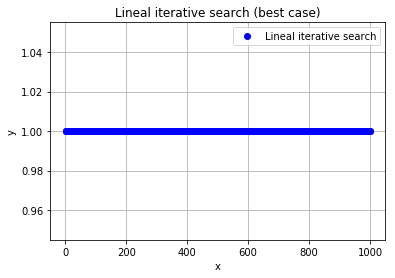

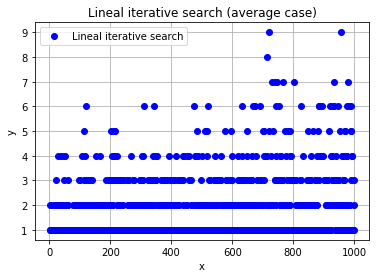

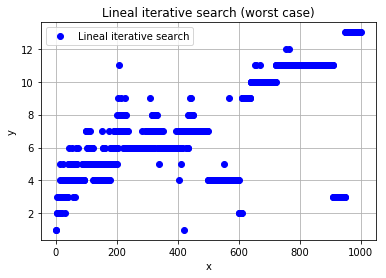

In [27]:
fig, ax = plt.subplots(facecolor='w', edgecolor='k')
ax.plot(x, y_omega, marker="o",color="b", linestyle='None')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.legend(["Lineal iterative search"])
plt.title('Lineal iterative search (best case)')
plt.show()

fig, ax = plt.subplots(facecolor='w', edgecolor='k')
ax.plot(x, y_efedeene, marker="o",color="b", linestyle='None')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.legend(["Lineal iterative search"])
plt.title('Lineal iterative search (average case)')
plt.show()

fig, ax = plt.subplots(facecolor='w', edgecolor='k')
ax.plot(x, y_omicron, marker="o",color="b", linestyle='None')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.legend(["Lineal iterative search"])
plt.title('Lineal iterative search (worst case)')
plt.show()